**Общая информация**

**Срок сдачи:** 16 марта 2020, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_mldata, fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
#from scipy.spatial import distance
from sklearn.neighbors import KDTree

In [3]:
from sklearn.metrics import pairwise_distances

In [4]:
from sklearn.metrics import accuracy_score

In [5]:
from sklearn.model_selection import cross_val_score

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
#else: # that is (self.type_algoritm=='brute' and self.type_metric=='euclidean' ):
            # pairwise_dist=distance.cdist(X_test,self.X_train,'euclidean') 
            # cdist works for iris, but dont work with sparce matrix
         #   pairwise_dist=pairwise_distances(X_test,self.X_train,'euclidean')
          #  ind=np.argpartition(pairwise_dist,self.n_neighbors,axis=1)

In [9]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute',metric='euclidean'):
        #print('init started,algoritm=',algorithm)
        self.n_neighbors=n_neighbors
        self.type_algoritm=algorithm
        self.type_metric=metric
        #print('init ended: self_type+metric=',self.type_algoritm)
        
    def score(self,X,y):
        return accuracy_score(y,self.predict(X))
    
    def fit(self, X, y):
        self.X_train=X
        self.y_train=y
    
    
    def predict(self,X):
        X_test=X
        
        if(self.type_algoritm=='kd_tree'):
            tree = KDTree(self.X_train, leaf_size=2)
            dist, ind = tree.query(X_test, k=self.n_neighbors) 
            
        if (self.type_algoritm=='brute' ):
            pairwise_dist=pairwise_distances(X_test,self.X_train,self.type_metric)
            ind=np.argpartition(pairwise_dist,self.n_neighbors,axis=1)
            
        
        
        #print("self.type_algoritm=",self.type_algoritm)
        cut_ind=ind[:,0:self.n_neighbors]
        mas=[]
        for i in range(X_test.shape[0]):
            mas.append(np.take_along_axis(self.y_train, cut_ind[i],axis = 0))
        mas=np.array(mas)
        otv=np.apply_along_axis(lambda r: np.bincount(r).argmax(),1,mas)
        return otv
    
    
    

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [10]:
iris = datasets.load_iris()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [12]:
print(X_train.shape)
print(X_test.shape)

(135, 4)
(15, 4)


In [13]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2,algorithm='brute')

In [14]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [15]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
print("difference is :",abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) ))
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"
print(sklearn_pred)
print(my_clf_pred)

difference is : 0.0
[2 1 0 1 1 2 1 2 0 1 2 1 0 0 0]
[2 1 0 1 1 2 1 2 0 1 2 1 0 0 0]


**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [16]:
%time clf.fit(X_train, y_train)

CPU times: user 558 µs, sys: 135 µs, total: 693 µs
Wall time: 584 µs


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [17]:
%time my_clf.fit(X_train, y_train)

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 7.87 µs


In [18]:
%time clf.predict(X_test)

CPU times: user 2.36 ms, sys: 926 µs, total: 3.29 ms
Wall time: 2.63 ms


array([2, 1, 0, 1, 1, 2, 1, 2, 0, 1, 2, 1, 0, 0, 0])

In [19]:
%time my_clf.predict(X_test)

CPU times: user 1.39 ms, sys: 795 µs, total: 2.18 ms
Wall time: 1.47 ms


array([2, 1, 0, 1, 1, 2, 1, 2, 0, 1, 2, 1, 0, 0, 0])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [20]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [21]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [22]:
%time clf.fit(X_train, y_train)

CPU times: user 743 µs, sys: 205 µs, total: 948 µs
Wall time: 825 µs


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [23]:
%time my_clf.fit(X_train, y_train)

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 8.34 µs


In [24]:
%time clf.predict(X_test)

CPU times: user 2 ms, sys: 741 µs, total: 2.74 ms
Wall time: 2.06 ms


array([2, 1, 0, 0, 0, 1, 1, 1, 0, 2, 2, 1, 2, 2, 0])

In [26]:
%time my_clf.predict(X_test)

CPU times: user 1.03 ms, sys: 419 µs, total: 1.45 ms
Wall time: 1.09 ms


array([2, 1, 0, 0, 0, 1, 1, 1, 0, 2, 2, 1, 2, 2, 0])

In [27]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
print("difference is :",abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) ))
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"
print(sklearn_pred)
print(my_clf_pred)

difference is : 0.0
[2 1 0 0 0 1 1 1 0 2 2 1 2 2 0]
[2 1 0 0 0 1 1 1 0 2 2 1 2 2 0]


**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [28]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [29]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

vectorizer = CountVectorizer(stop_words=ENGLISH_STOP_WORDS)
#vectorizer.fit(data)
X_train = vectorizer.fit_transform(data)


In [31]:
print(X_train.shape)
print(target.shape)
print(type(X_train))

(11314, 101322)
(11314,)
<class 'scipy.sparse.csr.csr_matrix'>


*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_train,target,test_size=0.33)

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [33]:
def get_eucl_score(data,target):
    X_train = CountVectorizer( stop_words=ENGLISH_STOP_WORDS).fit_transform(data)
    mas=[]
    for i in tqdm(range(1,11)):
        mas.append(np.array(cross_val_score(KNeighborsClassifier(n_neighbors=i,metric='euclidean'), X_train,target,scoring='accuracy',cv=3)).mean()) 
    return mas

In [35]:
from tqdm import tqdm

In [36]:
mas1=get_eucl_score(data,target)

100%|██████████| 10/10 [00:37<00:00,  3.94s/it]


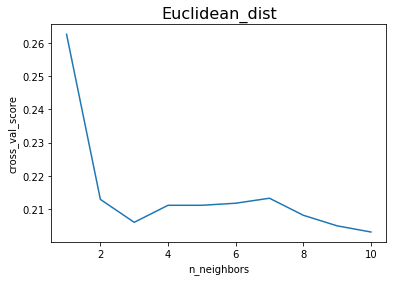

In [37]:
import matplotlib.pyplot as plt 
x=np.arange(1,11)
y1=np.array(mas1)
plt.plot(x,y1)
plt.xlabel('n_neighbors')
plt.ylabel('cross_val_score')
plt.title('Euclidean_dist',fontsize=16) 
plt.show()

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

In [38]:
def get_cosine_score(data,target):
    X_train = CountVectorizer( stop_words=ENGLISH_STOP_WORDS).fit_transform(data)
    mas=[]
    for i in tqdm(range(1,11)):
        mas.append(np.array(cross_val_score(KNeighborsClassifier(n_neighbors=i,metric='cosine'), X_train, target, cv=3)).mean()) 
    return mas

In [39]:
def get_eucl_tfidf_score(data,target):
    X_train = TfidfVectorizer( stop_words=ENGLISH_STOP_WORDS).fit_transform(data)
    mas=[]
    for i in tqdm(range(1,11)):
        mas.append(np.array(cross_val_score(KNeighborsClassifier(n_neighbors=i,metric='euclidean'), X_train, target, cv=3)).mean()) 
    return mas

In [40]:
def get_cosine_tfidf_score(data,target):
    X_train = TfidfVectorizer( stop_words=ENGLISH_STOP_WORDS).fit_transform(data)
    mas=[]
    for i in tqdm(range(1,11)):
        mas.append(np.array(cross_val_score(KNeighborsClassifier(n_neighbors=i,metric='cosine'), X_train, target, cv=3)).mean()) 
    return mas

In [41]:
mas2=get_cosine_score(data,target)

100%|██████████| 10/10 [00:34<00:00,  3.63s/it]


In [42]:
mas3=get_eucl_tfidf_score(data,target)

100%|██████████| 10/10 [00:36<00:00,  3.79s/it]


In [43]:
mas4=get_cosine_tfidf_score(data,target)

100%|██████████| 10/10 [00:33<00:00,  3.54s/it]


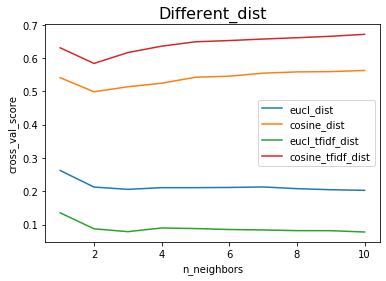

In [44]:
x=np.arange(1,11)
y1=np.array(mas1)
y2=np.array(mas2)
y3=np.array(mas3)
y4=np.array(mas4)
plt.plot(x,y1,label='eucl_dist')
plt.plot(x,y2,label='cosine_dist')
plt.plot(x,y3,label='eucl_tfidf_dist')
plt.plot(x,y4,label='cosine_tfidf_dist')
plt.xlabel('n_neighbors')
plt.ylabel('cross_val_score')
plt.title('Different_dist',fontsize=16) 
plt.legend()
plt.show()

In [45]:
print('best_score=',mas4[9])

best_score= 0.6712928974608263


Мы видим, что лучше всех предсказывает модель с косинусным расстоянием и tf-idf векторизацией.

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [46]:
test_newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])
test_data = test_newsgroups['data']
test_target = test_newsgroups['target']

In [47]:
X_test = vectorizer.fit_transform(test_data)

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [48]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])
data = newsgroups['data']
target = newsgroups['target']

test_newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])
test_data = test_newsgroups['data']
test_target = test_newsgroups['target']

train_vectorizer=TfidfVectorizer( stop_words=ENGLISH_STOP_WORDS)
X_train = train_vectorizer.fit_transform(data)
test_vectorizer=TfidfVectorizer( stop_words=ENGLISH_STOP_WORDS,vocabulary=train_vectorizer.get_feature_names())
X_test = test_vectorizer.fit_transform(test_data)

clf = MyKNeighborsClassifier(n_neighbors=10, metric='cosine')
clf.fit(X_train, target)


In [49]:
print(X_train.shape)
print(X_test.shape)

(11314, 101322)
(7532, 101322)


In [50]:
%time pred_test_target=clf.predict(X_test)
print(pred_test_target[0:15])

CPU times: user 3.14 s, sys: 604 ms, total: 3.75 s
Wall time: 3.23 s
[ 4  1  0  0 19 13  8 17  5  2  2  1 17  7 15]


In [51]:
print("score_at_test=",accuracy_score(pred_test_target, test_target))

score_at_test= 0.5994423791821561


Мы видим, что качество на тесте несколько хуже, чем на валидации, но это логично, потому что модель никогда не видела данные из теста и поэтому не была под них переобучена, в отличие от трейновых данных.